# Multi-class Classification of Anonymized 'Adult' Dataset - Linear SVC

## 1. Classification of 3-anonymous dataset using Linear SVC

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
from sklearn import metrics, preprocessing, model_selection
from sklearn.svm import LinearSVC

In [3]:
def read_anon_data(d, k, extension): # extension is optional
    directory = "../../data/ARX/"
    ext = ".csv"
    filepath = directory + d + "/adult_k" + str(k) + extension + ext
    dataset = pd.read_csv(filepath, sep=r'\s*,\s*', engine='python')
    return dataset

In [4]:
def number_encode_features(ds):
    result = ds.copy()
    encoders = {}
    for feature in result.columns:
        if result.dtypes[feature] == np.object:
            encoders[feature] = preprocessing.LabelEncoder()
            result[feature] = encoders[feature].fit_transform(result[feature].astype(str))
    return result, encoders

In [5]:
scaler = preprocessing.StandardScaler()

In [6]:
clf = LinearSVC()

## 1.1. Partial anonymization on all attributes with defined hierarchies

This is the case where every attaribute is anonymized locally, no matter numerical or categorical. We will compare results with number-encoded data and binary data. For original data, binary attributes showed much better performance.

In [10]:
dataset = read_anon_data("multi-class-edu", 3, "")
dataset.head(10)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,Female,0,0,NaN,Non-US,<=50K
1,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,Female,0,0,NaN,Non-US,<=50K
2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,Female,0,0,NaN,Non-US,<=50K
3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,Male,0,0,NaN,Non-US,<=50K
4,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,Male,0,2179,NaN,Non-US,<=50K
5,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,Male,0,0,NaN,Non-US,<=50K
6,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,Male,0,0,NaN,Non-US,<=50K
7,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,Male,0,0,NaN,Non-US,<=50K
8,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,Female,0,0,NaN,United-States,<=50K
9,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,Female,0,0,NaN,United-States,<=50K


### Number-encoded data

In [11]:
# preprocess
del dataset['fnlwgt']
dataset_encoded, encoders = number_encode_features(dataset)
# define target
y = dataset_encoded['education-num']
X = dataset_encoded.drop('education-num', axis=1)
# more preprocessing
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# cross validation scores
scores = model_selection.cross_val_score(clf, X, y, cv=10, scoring="f1_micro")
print("F1 score: %0.2f (+/- %0.2f)" 
      % (scores.mean(), scores.std() * 2))
# prediction
predicted = model_selection.cross_val_predict(clf, X, y, cv=10)
f1_k3 = metrics.f1_score(y, predicted, average='micro')
print(f1_k3)

F1 score: 0.45 (+/- 0.10)
0.4504011670313639


### Binary data

In [12]:
# with binary data
binary_data = pd.get_dummies(dataset)
# redefine target value
y_bin = binary_data['education-num']
X_bin = binary_data.drop('education-num', axis=1)

# scale 
X_bin = pd.DataFrame(scaler.fit_transform(X_bin), columns=X_bin.columns)

# cross validation scores 
scores = model_selection.cross_val_score(clf, X_bin, y_bin, cv=10, scoring='f1_micro')
print("F1 score: %0.2f (+/- %0.2f)" 
      % (scores.mean(), scores.std() * 2))

# prediction
predicted = model_selection.cross_val_predict(clf, X_bin, y_bin, cv=10)
metrics.f1_score(y_bin, predicted, average='micro')

F1 score: 0.31 (+/- 0.33)


0.31526423977189844

## 1.2. Partial anonymization on non-continuous attributes

In this case categorical attributes are anonymized in the same manner as in previous case. For the continuous attributes we performed global anonymization, meaning all values withing the column are anonymized on the same anonymization level. This reduces number of different values for such attribues and avoids mixing numerical and categorical data in the same attribute. 

In [21]:
# read dataset
dataset = read_anon_data("without-contin-hie", 3, "_done")
dataset.head()
dataset.shape

(30053, 13)

### Number-encoded data

In [23]:
# preprocess
dataset_encoded, encoders = number_encode_features(dataset)
# define target
y = dataset_encoded['education-num']
X = dataset_encoded.drop('education-num', axis=1)
# more preprocessing
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# cross validation scores
scores = model_selection.cross_val_score(clf, X, y, cv=10, scoring="f1_micro")
print("F1 score: %0.2f (+/- %0.2f)" 
      % (scores.mean(), scores.std() * 2))
# prediction
predicted = model_selection.cross_val_predict(clf, X, y, cv=10)
f1_k3_2 = metrics.f1_score(y, predicted, average='micro')
print(f1_k3_2)

F1 score: 0.45 (+/- 0.13)
0.4479752437360663


### Binary data

In [16]:
# try binary data
binary_data = pd.get_dummies(dataset)
# redefine target value
y_bin = binary_data['education-num']
X_bin = binary_data.drop('education-num', axis=1)

# scale 
X_bin = pd.DataFrame(scaler.fit_transform(X_bin), columns=X_bin.columns)

# cross validation scores 
scores = model_selection.cross_val_score(clf, X_bin, y_bin, cv=10, scoring='f1_micro')
print("F1 score: %0.2f (+/- %0.2f)" 
      % (scores.mean(), scores.std() * 2))

# prediction
predicted = model_selection.cross_val_predict(clf, X_bin, y_bin, cv=10)
metrics.f1_score(y_bin, predicted, average='micro')

F1 score: 0.32 (+/- 0.28)


0.32086731649094885

In [ ]:
# TOOO perform for all k

## 2. Comparison of differently anonymized datasets

In [9]:
k_values = [1, 3, 7, 11, 15, 19, 23, 27, 31, 35, 100]
f1_scores1 = [0.6095418075724421, 0.4504011670313639]
f1_scores2 = [0.6095418075724421, 0.4479752437360663]

for k in k_values:
    if k is 1 or k is 3:
        continue
    dataset1 = read_anon_data("multi-class-edu", k, "")
    dataset2 = read_anon_data("without-contin-hie", k, "_done")
    
    # preprocess
    if 'fnlwgt' in dataset1.columns:
        del dataset1['fnlwgt']
    if 'fnlwgt' in dataset2.columns:
        del dataset2['fnlwgt']
    dataset_encoded1, encoders1 = number_encode_features(dataset1)
    dataset_encoded2, encoders2 = number_encode_features(dataset2)
    
    # define target
    y1 = dataset_encoded1['education-num']
    X1 = dataset_encoded1.drop('education-num', axis=1)
    
    y2 = dataset_encoded2['education-num']
    X2 = dataset_encoded2.drop('education-num', axis=1)
    
    # more preprocessing
    X1 = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
    X2 = pd.DataFrame(scaler.fit_transform(X2), columns=X2.columns)
    
    # prediction
    predicted1 = model_selection.cross_val_predict(clf, X1, y1, cv=10)
    f1_scores1.append(metrics.f1_score(y1, predicted1, average='micro'))
    
    predicted2 = model_selection.cross_val_predict(clf, X2, y2, cv=10)
    f1_scores2.append(metrics.f1_score(y2, predicted2, average='micro'))
    
    # log
    print("Classified anonymous data with k=" + str(k) + 
          "\n\t f1_score=" + str(metrics.f1_score(y2, predicted2, average='micro')))

Classified anonymous data with k=7
	 f1_score=0.41693746269646526
Classified anonymous data with k=11
	 f1_score=0.4473789783364536
Classified anonymous data with k=15
	 f1_score=0.40813192682601146
Classified anonymous data with k=19
	 f1_score=0.42347346015697745
Classified anonymous data with k=23
	 f1_score=0.39635965784762284
Classified anonymous data with k=27
	 f1_score=0.3877063855182017
Classified anonymous data with k=31
	 f1_score=0.4082952058882037
Classified anonymous data with k=35
	 f1_score=0.42702738545189306
Classified anonymous data with k=100
	 f1_score=0.3872422253166235


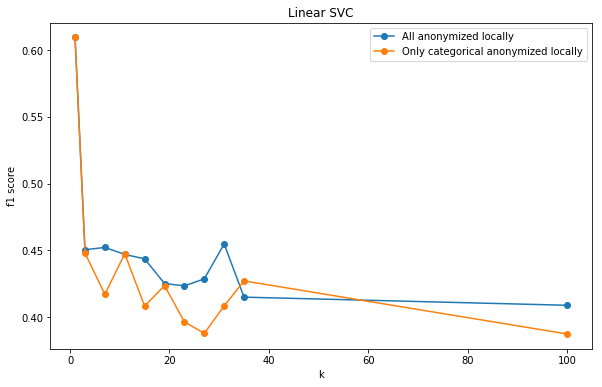

In [11]:
# visualize
plt.figure(figsize=(9.7,6))
line1, = plt.plot(k_values, f1_scores1, marker='o', label='All anonymized locally')
line2, = plt.plot(k_values, f1_scores2, marker='o', label='Only categorical anonymized locally')
plt.ylabel('f1 score')
plt.xlabel('k')
plt.title('Linear SVC')
plt.legend(handles=[line1, line2])

In [12]:
# pickle f1 scores 2.1
outfile = open('../../data/ARX/multi-class-edu/SVC_f1_scores', 'wb')
pickle.dump(f1_scores1, outfile)
outfile.close()

In [13]:
# pickle f1 scores 2.3
outfile = open('../../data/ARX/without-contin-hie/SVC_f1_scores', 'wb')
pickle.dump(f1_scores2, outfile)
outfile.close()